In [49]:
# Data Setup and Cleaning
# Added Type column in excel

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import re

df = pd.read_csv('raw-keywords-01.28.2020.csv')
df.head(1)

,Alpha Clicks,Alpha Conversions,Compiled,Beta Impressions,Beta Clicks,Compiled.1,Search term,Match type,Added/Excluded,Campaign,Type,Ad group,Impr.,Clicks,CTR,Currency code,Cost,Conversions,Cost / conv.,Conv. rate
0,Flag,Flag,FlagFlag,Flag,NaN,Flag,blueboard,Exact match,Added,Google_Search_Brand_AllGeos_Alpha,Alpha,Brand Core,"1,272",323,25.39%,USD,281,13,23,3.87%


In [13]:
df = df[['Search term', 'Match type',
       'Added/Excluded', 'Campaign', 'Type', 'Ad group', 'Clicks', 'Impr.', 'Cost', 'Conversions']]

In [14]:
df['Impr.'] = df['Impr.'].str.replace(',','')
df['Impr.'] = df['Impr.'].astype(float)

### Alpha Beta Charlie Performance

In [15]:
from pandas import pivot_table
abc = pivot_table(df, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Type', aggfunc = sum)
abc = abc[['Impr.','Clicks','Conversions','Cost']]

def ratios(aaa):
    aaa['CTR'] = round((aaa['Clicks']/aaa['Impr.'])*100,2)
    aaa['CR'] = round((aaa['Conversions']/aaa['Clicks'])*100,2)
    aaa['CPA'] = round((aaa['Cost']/aaa['Conversions']),2)
    aaa = aaa[['Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]


abc['CTR'] = round((abc['Clicks']/abc['Impr.'])*100,2)
abc['CR'] = round((abc['Conversions']/abc['Clicks'])*100,2)
abc['CPA'] = round((abc['Cost']/abc['Conversions']),2)
abc = abc[['Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
abc

,Impr.,CTR,Clicks,CR,Conversions,Cost,CPA
Type,,,,,,,
Alpha,7739.0,14.63,1132,1.68,19,5193,273.32
Beta,9179.0,42.59,3909,1.15,45,17514,389.20
Charlie,8091.0,57.00,4612,1.00,46,12221,265.67


____________________________________________________________________________

### Charlie Keywords that Converted

In [16]:
charlie = df[df['Type']=='Charlie']
charlie[charlie['Conversions'] > 0]

,Search term,Match type,Added/Excluded,Campaign,Type,Ad group,Clicks,Impr.,Cost,Conversions
1,https hertzrecognitions awardco com,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,29,71.0,68,2
81,retire opm gov,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Retirement,7,28.0,20,1
155,vistana recognition,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,7,6.0,13,1
177,service award companies,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Anniversary,2,2.0,31,3
313,https fellowes awardco com,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,3,3.0,7,1
328,transdev benefits,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Perks,3,2.0,6,1
527,years of service awards,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Anniversary,1,5.0,6,1
695,support rewards com,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Rewards,2,3.0,4,1
697,www awardselect com novipax1,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,1,3.0,3,1
698,vistanarecognition,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,2,3.0,6,1


________________________________________________________________________________________

### Alpha Performance

In [17]:
alpha = df[df['Type']=='Alpha']
ag_alpha = pivot_table(alpha, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Ad group', aggfunc = sum)
ag_alpha = ag_alpha[['Impr.','Clicks','Conversions','Cost']]
ratios(ag_alpha) #use function instead

ag_alpha.sort_values('Conversions',ascending=False,inplace=True)
#fix index
ag_alpha = pd.DataFrame(ag_alpha)
ag_alpha['adgroup']=ag_alpha.index
ag_alpha = ag_alpha.reset_index(drop=True)
ag_alpha=ag_alpha[['adgroup','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]

In [18]:
alpha = df[df['Type']=='Alpha']
ag_alpha = pivot_table(alpha, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Ad group', aggfunc = sum)
ag_alpha = ag_alpha[['Impr.','Clicks','Conversions','Cost']]
ratios(ag_alpha) #use function instead
#ag_alpha['CPA'] = round(ag_alpha['Cost']/ag_alpha['Conversions'],2)
#ag_alpha['CTR'] = round((ag_alpha['Clicks']/ag_alpha['Impr.'])*100,2)
#ag_alpha['CR'] = round((ag_alpha['Conversions']/ag_alpha['Clicks'])*100,2)
#ag_alpha = ag_alpha[['Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
ag_alpha.sort_values('Conversions',ascending=False,inplace=True)
#fix index
ag_alpha = pd.DataFrame(ag_alpha)
ag_alpha['adgroup']=ag_alpha.index
ag_alpha = ag_alpha.reset_index(drop=True)
ag_alpha=ag_alpha[['adgroup','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]

Create a heatmap of how Ad Groups have been performing with conversion rate listed on the plot (and colored) and number of clicks along the x-axis.

Text(0.5, 1, 'Clicks x Conversion Rate Alpha Heatmap')

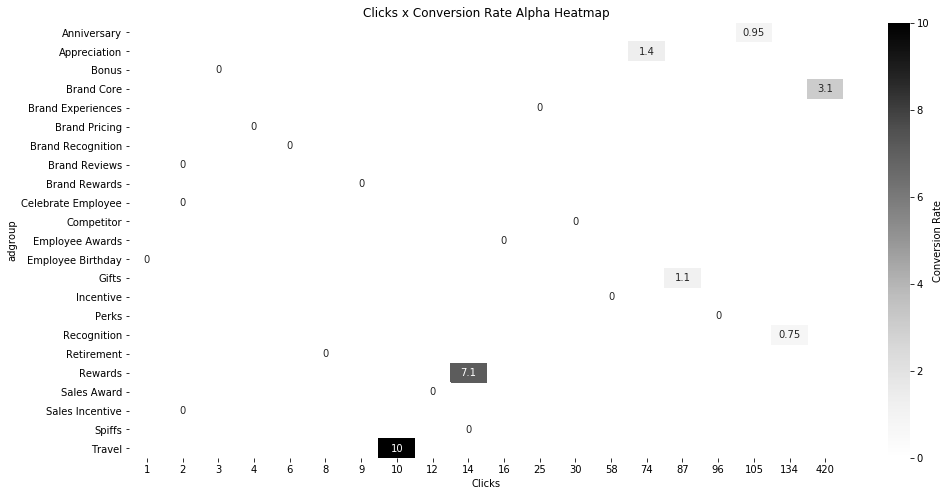

In [19]:
plt.figure(figsize=(16, 8))
sns.heatmap(ag_alpha.pivot("adgroup","Clicks","CR"), cmap="Greys", annot=True, cbar_kws={'label': 'Conversion Rate'})
plt.title('Clicks x Conversion Rate Alpha Heatmap')

`Gifts`,`Competitors`, and `Perks` are all problem campaigns.

Look into `Sales Incentive` and see if we can get more impressions.

# Beta Performance

In [20]:
beta = df[df['Type']=='Beta']
ag_beta = pivot_table(beta, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Ad group', aggfunc = sum)
ag_beta = ag_beta[['Impr.','Clicks','Conversions','Cost']]
ratios(ag_beta) #use function instead

ag_beta.sort_values('Conversions',ascending=False,inplace=True)
#fix index
ag_beta = pd.DataFrame(ag_beta)
ag_beta['adgroup']=ag_beta.index
ag_beta = ag_beta.reset_index(drop=True)
ag_beta=ag_beta[['adgroup','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]

Text(0.5, 1, 'Clicks x Conversion Rate Beta Heatmap')

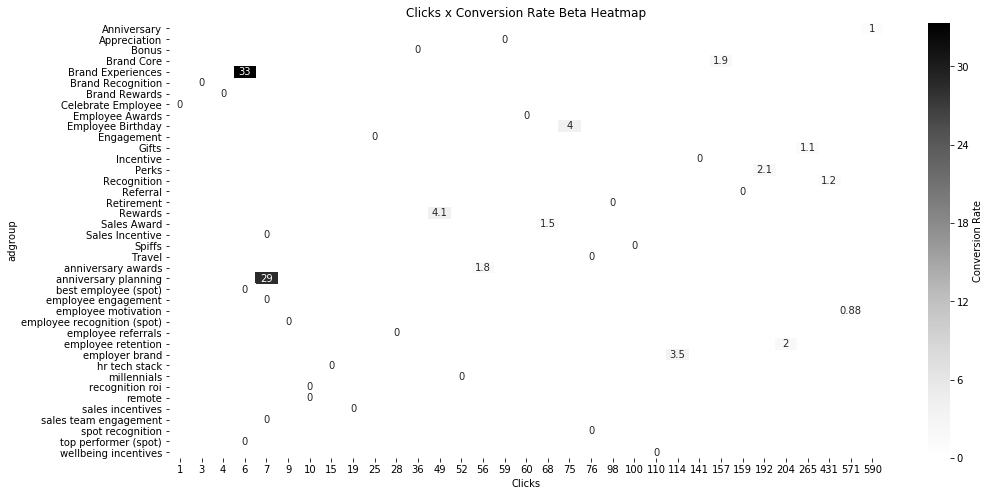

In [22]:
plt.figure(figsize=(16, 8))
sns.heatmap(ag_beta.pivot("adgroup","Clicks","CR"), cmap="Greys", annot=True, cbar_kws={'label': 'Conversion Rate'})
plt.title('Clicks x Conversion Rate Beta Heatmap')

In [23]:
charlie = df[df['Type']=='Charlie']
ag_charlie = pivot_table(charlie, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Ad group', aggfunc = sum)
ag_charlie = ag_charlie[['Impr.','Clicks','Conversions','Cost']]
ratios(ag_charlie) #use function instead

ag_charlie.sort_values('Conversions',ascending=False,inplace=True)
#fix index
ag_charlie = pd.DataFrame(ag_charlie)
ag_charlie['adgroup']=ag_charlie.index
ag_charlie = ag_charlie.reset_index(drop=True)
ag_charlie=ag_charlie[['adgroup','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]

Text(0.5, 1, 'Clicks x Conversion Rate Charlie Heatmap')

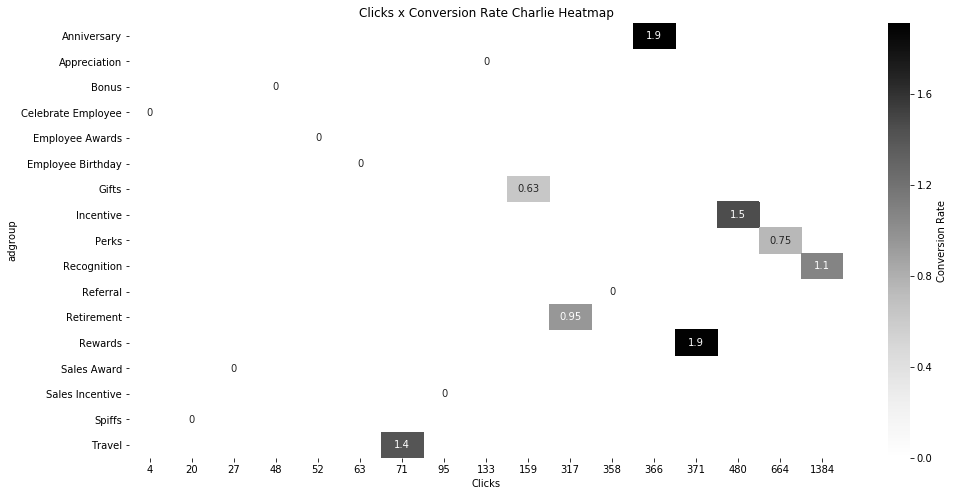

In [24]:
plt.figure(figsize=(16, 8))
sns.heatmap(ag_charlie.pivot("adgroup","Clicks","CR"), cmap="Greys", annot=True, cbar_kws={'label': 'Conversion Rate'})
plt.title('Clicks x Conversion Rate Charlie Heatmap')

Which ad groups in charlie campaigns do we need to keep a better eye on?

________________________________________________________________________________

### Campaign Performance

In [25]:
campaign = pivot_table(df, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Campaign', aggfunc = sum)
campaign = campaign[['Impr.','Clicks','Conversions','Cost']]
campaign['CPA'] = round(campaign['Cost']/campaign['Conversions'],2)
campaign['CTR'] = round((campaign['Clicks']/campaign['Impr.'])*100,2)
campaign['CR'] = round((campaign['Conversions']/campaign['Clicks'])*100,2)
campaign = campaign[['Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
campaign.sort_values('Conversions',ascending=False,inplace=True)
#fix index
campaign = pd.DataFrame(campaign)
campaign['Campaign']=campaign.index
campaign = campaign.reset_index(drop=True)
campaign=campaign[['Campaign','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
campaign['CPA'] = campaign['CPA'].fillna(1000)
campaign

,Campaign,Impr.,CTR,Clicks,CR,Conversions,Cost,CPA
0,Google_Search_NB_AllGeos_Charlie,8091.0,57.00,4612,1.00,46,12221,265.67
1,Google_Search_NB_AllGeos_Beta,3446.0,56.27,1939,0.83,16,9453,590.81
2,Google_Search_NB_Resources_Beta,3589.0,26.05,935,1.60,15,2794,186.27
3,Google_Search_Brand_AllGeos_Alpha,2064.0,22.58,466,2.79,13,715,55.00
4,Google_Search_NB_AllGeos_Beta_tCPA,924.0,60.06,555,1.44,8,2304,288.00
5,Google_Search_NB_AllGeos_Alpha,4659.0,11.18,521,1.15,6,3318,553.00
6,Google_Search_Brand_AllGeos_Beta,204.0,62.25,127,3.15,4,762,190.50
7,Google_Search_Brand_AllGeos_Beta_eCPC,46.0,93.48,43,2.33,1,218,218.00
8,Google_Search_NB_Products_Beta,970.0,31.96,310,0.32,1,1983,1983.00
9,Google_Search_NB_AllGeos_Alpha_eCPC,549.0,20.95,115,0.00,0,935,inf


Text(0.5, 1, 'Clicks x Conversion Rate Alpha Heatmap')

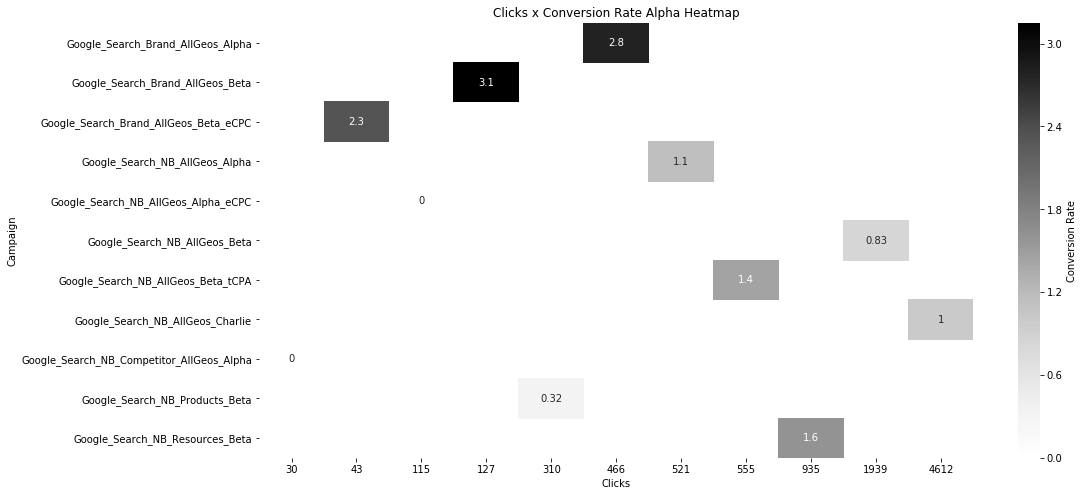

In [26]:
plt.figure(figsize=(16, 8))
sns.heatmap(campaign.pivot("Campaign","Clicks","CR"), cmap="Greys", annot=True, cbar_kws={'label': 'Conversion Rate'})
plt.title('Clicks x Conversion Rate Alpha Heatmap')

## Extra Analysis

In [27]:
df[df['Ad group']== 'Travel'].sort_values('Conversions',ascending=False)

,Search term,Match type,Added/Excluded,Campaign,Type,Ad group,Clicks,Impr.,Cost,Conversions
1784,customer incentive vacations,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Travel,1,1.0,4,1
696,travel incentives,Exact match (close variant),None,Google_Search_NB_AllGeos_Alpha,Alpha,Travel,1,3.0,10,1
4998,incentive trip punta de mita,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Travel,1,1.0,5,0
4615,1 vacation giveaway incentives,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Travel,1,1.0,4,0
4622,incentive travel rewards,Phrase match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Travel,1,1.0,4,0
4690,travel rewards incentive,Broad match,None,Google_Search_NB_AllGeos_Beta,Beta,Travel,1,1.0,3,0
4846,travel incentive subscriptions,Phrase match (close variant),None,Google_Search_NB_AllGeos_Beta_tCPA,Beta,Travel,1,1.0,4,0
4895,cnp for incentive travel,Phrase match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Travel,1,1.0,2,0
4996,incentive travel illinois,Phrase match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Travel,1,1.0,5,0
5008,meetings and incentives companies,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Travel,1,1.0,5,0
